<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных." data-toc-modified-id="Загрузка-и-подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Очистка-и-лемматизация-текста." data-toc-modified-id="Очистка-и-лемматизация-текста.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Очистка и лемматизация текста.</a></span></li><li><span><a href="#Разделение-данных-на-выборки." data-toc-modified-id="Разделение-данных-на-выборки.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Разделение данных на выборки.</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей." data-toc-modified-id="Обучение-моделей.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей.</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression." data-toc-modified-id="Модель-LogisticRegression.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель LogisticRegression.</a></span></li><li><span><a href="#Модель-CatBoostClassifier." data-toc-modified-id="Модель-CatBoostClassifier.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель CatBoostClassifier.</a></span><ul class="toc-item"><li><span><a href="#на-исходных-необработанных-данных." data-toc-modified-id="на-исходных-необработанных-данных.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>на исходных необработанных данных.</a></span></li><li><span><a href="#на-лемматизированном-тексте." data-toc-modified-id="на-лемматизированном-тексте.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>на лемматизированном тексте.</a></span></li><li><span><a href="#на-векторизованных-данных." data-toc-modified-id="на-векторизованных-данных.-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>на векторизованных данных.</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-качества-лучшей-модели-на-тестовой-выборке." data-toc-modified-id="Проверка-качества-лучшей-модели-на-тестовой-выборке.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка качества лучшей модели на тестовой выборке.</a></span><ul class="toc-item"><li><span><a href="#Проверка-выбранной-модели-на-вменяемость." data-toc-modified-id="Проверка-выбранной-модели-на-вменяемость.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка выбранной модели на вменяемость.</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><b>Общий вывод по исследованию:</b></a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
<b>"Определение токсичности комментариев в интернет-магазине «Викишоп» "</b>

***

**Цели проекта:**
- обучить модель классифицировать комментарии на позитивные и негативные.
    
***
    
**Задачи исследования:**  
- на основании имеющегося набора данных с разметкой о токсичности правок построить модель, которая умеет классифицировать комментарии на позитивные и негативные;
- построить модель со значением метрики качества F1 не меньше 0.75.    

***
    
**Этапы исследования:** 
* загрузка и подготовка данных
* обучение разных моделей с различными гиперпараметрами
* проверка данных на тестовой выборке 
* вывод по исследованию

***
<b>Признаки:</b>
* text — текст комментария
* toxic — целевой признак
    
</div>

***

### Загрузка и подготовка данных.

#### Загрузка данных.

In [15]:
import warnings
import os
import re
import nltk
import spacy

import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import arange
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

from nltk.corpus import stopwords as nltk_stopwords

from sklearn.model_selection import (
    train_test_split,    
    GridSearchCV, 
    RandomizedSearchCV
)
from sklearn.metrics import (
    f1_score,    
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

# Константы
RANDOM_STATE = 12345

In [16]:
# Открываем файл с данными.
pth1 = 'C:/Датасеты и проекты/toxic_comments.csv'
pth2 = '/datasets/toxic_comments.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, parse_dates=[0])
else:
    print('Something is wrong')

In [17]:
# Выводим первые 5 строк датасета с данными.
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [18]:
# Получение информации о датасете.
data_all = [data]
data_names = ['Комментарии']

for i in range(len(data_all)):
        print(f'Количество строк и столбцов в датасете "{data_names[i]}": {data_all[i].shape}')
        print('-' * 30)
        print(f'Пропуски в датасете "{data_names[i]}":\n{data_all[i].isna().sum()}')
        print('-' * 30)
        print(f'Информация о типах данных в датасете "{data_names[i]}":\n{data_all[i].dtypes}')
        print('-' * 30)
        print('Распределение численных значений признаков в датасете:')
        display(data_all[i].describe().T)
        print('-' * 30)
        print(f'Количество явных дубликатов в датасете: {data_all[i].duplicated().sum()}')
        print('<-->' * 15,'\n')     

Количество строк и столбцов в датасете "Комментарии": (159292, 3)
------------------------------
Пропуски в датасете "Комментарии":
Unnamed: 0    0
text          0
toxic         0
dtype: int64
------------------------------
Информация о типах данных в датасете "Комментарии":
Unnamed: 0    object
text          object
toxic          int64
dtype: object
------------------------------
Распределение численных значений признаков в датасете:


,count,mean,std,min,25%,50%,75%,max
toxic,159292.0,0.101612,0.302139,0.0,0.0,0.0,0.0,1.0


------------------------------
Количество явных дубликатов в датасете: 0
<--><--><--><--><--><--><--><--><--><--><--><--><--><--><--> 



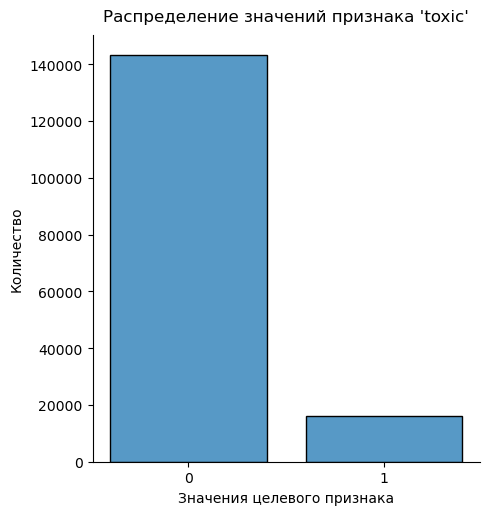

In [19]:
# Посмотрим распределение значений признака 'toxic' на графике.
sns.displot(data, x="toxic", shrink=.8, discrete=True)

plt.xticks(data['toxic'].unique())
plt.xlabel('Значения целевого признака')
plt.ylabel('Количество')
plt.title("Распределение значений признака 'toxic'", pad = 10);

<div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается несбалансированность классов в целевом признаке ('toxic').
    
</div>

#### Подготовка данных.

In [20]:
# Количественные значения классов в целевом признаке:
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [21]:
# Вычислим соотношение дисбаланса значений классов в целевом признаке.
class_ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]
class_ratio

8.841344371679229

<div class="alert alert-info"><b>Комментарий:</b>
   
Дисбаланс классов в целевом признаке ('toxic') составляет примерно 1:9.
    
</div>

##### Очистка и лемматизация текста.

In [23]:
%%time

nlp = spacy.load('en_core_web_sm')

# Очистка текста.
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Z]', ' ', text.lower()).split())

# Лемматизация текста.
def lemmatize(text):
    global nlp
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

data['clear_text'] = data['text'].progress_apply(clear_text)
data['lemm_text'] = data['clear_text'].progress_apply(lemmatize)

  0%|          | 0/159292 [00:00<?, ?it/s]

  0%|          | 0/159292 [00:00<?, ?it/s]

Wall time: 43min 24s


In [24]:
# Проверка данных на пропуски после лемматизации.
data.isna().sum()

Unnamed: 0    0
text          0
toxic         0
clear_text    0
lemm_text     0
dtype: int64

In [26]:
# Удалим столбцы 'Unnamed: 0' и 'clear_text'.
data = data.drop(['Unnamed: 0', 'clear_text'], axis=1)

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

В связи с ненадобностью удалим столбец 'clear_text'.   
Столбец 'Unnamed: 0' удалим по причине того, что он дублирует значения индекса и какой-либо значимости для дельнейшего обучения моделей не несет.
    
</div>

##### Разделение данных на выборки.

In [27]:
# Разделим исходные данные на обучающую и тестовую выборки из расчета 90% - 10% соответственно.

features = data.drop(['toxic', 'text'], axis=1)
target = data['toxic']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=.1,
                                                                            random_state=RANDOM_STATE,
                                                                            stratify = data['toxic']
                                                                           )

for i in [features_train, features_test, target_train, target_test]:
    print (i.shape)

(143362, 1)
(15930, 1)
(143362,)
(15930,)


***

### Обучение моделей.

#### Модель LogisticRegression.

In [28]:
%%time

nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

model = LogisticRegression(solver='liblinear', 
                           max_iter=200, 
                           random_state=RANDOM_STATE
                          )

pipeline = Pipeline(steps=
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("model", model),
    ]
)

parameter_grid = {'model__C': (.1, 1, 5, 10, 20),                  
                  'model__class_weight': [None, {0:1, 1:class_ratio}], # <-- добавил
                 }
                
gscv_lr = GridSearchCV(pipeline,
                       parameter_grid,
                       scoring='f1',
                       cv=3,
                       verbose=10,
                       n_jobs=-1,                       
                      )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


Wall time: 490 ms


[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
%%time
# Обучение модели:
gscv_lr.fit(features_train['lemm_text'].values.astype(str), target_train)

print('F1-мера модели LogisticRegression =', round(gscv_lr.best_score_, 4))
print('при параметрах', gscv_lr.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
F1-мера модели LogisticRegression = 0.7762
при параметрах {'model__C': 20, 'model__class_weight': None}
Wall time: 8min 37s


<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

Модель LogisticRegression на кросс-валидации показала результат F1-метрики 0.7762.

</div>

#### Модель CatBoostClassifier.

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

Поскольку в выборках, полученных ранее, признак 'test' был удален, разделим данные для обучения на сырых данных на новые выборки.
    
    
</div>

##### на исходных необработанных данных.

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

Реализовал обучение на необработанных данных через кросс-валидацию.
    
</div>

In [30]:
# Разделим данные на новые выборки (оставим исходные необработанные данные).
features_cb = data.drop(['toxic', 'lemm_text'], axis=1)
target_cb = data['toxic']

features_train_cb, features_test_cb, target_train_cb, target_test_cb = train_test_split(features_cb,
                                                                                        target_cb,
                                                                                        test_size=.1,
                                                                                        random_state=RANDOM_STATE,
                                                                                        stratify = data['toxic']
                                                                                       )

for i in [features_train_cb, features_test_cb, target_train_cb, target_test_cb]:
    print (i.shape)

(143362, 1)
(15930, 1)
(143362,)
(15930,)


In [31]:
%%time

model = CatBoostClassifier(n_estimators=350, 
                           learning_rate=0.4,
                           silent=True, 
                           random_state=RANDOM_STATE
                          )

parameter_grid = {'depth': range(1, 10, 2),
                 }
                
gscv_cb_base = RandomizedSearchCV(model,
                                  parameter_grid,
                                  scoring='f1',
                                  cv=3,
                                  # n_jobs=-1,
                                 )

Wall time: 28.9 ms


In [32]:
%%time
# Обучение модели на исходных необработанных данных.
gscv_cb_base.fit(features_train_cb, target_train_cb, text_features=['text'])
print('F1-мера модели CatBoostClassifier (на исходных необработанных данных) =', round(gscv_cb_base.best_score_,4))
print('при параметрах', gscv_cb_base.best_params_)

F1-мера модели CatBoostClassifier (на исходных необработанных данных) = 0.6993
при параметрах {'depth': 7}
Wall time: 33min 35s


<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>
   
Модель справляется с обработкой исходных необработанных данных, но качество при этом недостаточное (значение F1-метрики: 0.6993).  
</div>

##### на лемматизированном тексте.

In [33]:
model = CatBoostClassifier(n_estimators=350, silent=True, random_state=RANDOM_STATE)

parameter_grid = {'learning_rate': arange(.1, 0.5, .1),
                  'depth': range(5, 10, 2),
                 }
                
gscv_cb_lemm = RandomizedSearchCV(model,
                                  parameter_grid,
                                  scoring='f1',
                                  cv=3,
                                  verbose=10,
                                  n_jobs=-1,
                                 )

In [34]:
%%time
# Обучим модель CatBoostClassifier на лемматизированном тексте.
gscv_cb_lemm.fit(features_train, target_train, text_features=['lemm_text'])
print('F1-мера модели CatBoostClassifier (на данных после лемматизации) =', round(gscv_cb_lemm.best_score_,4))
print('при параметрах', gscv_cb_lemm.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START depth=7, learning_rate=0.1.................................
[CV 1/3; 1/10] END ..depth=7, learning_rate=0.1;, score=0.788 total time= 2.4min
[CV 2/3; 1/10] START depth=7, learning_rate=0.1.................................
[CV 2/3; 1/10] END ..depth=7, learning_rate=0.1;, score=0.780 total time= 2.5min
[CV 3/3; 1/10] START depth=7, learning_rate=0.1.................................
[CV 3/3; 1/10] END ..depth=7, learning_rate=0.1;, score=0.786 total time= 2.2min
[CV 1/3; 2/10] START depth=9, learning_rate=0.4.................................
[CV 1/3; 2/10] END ..depth=9, learning_rate=0.4;, score=0.789 total time= 7.0min
[CV 2/3; 2/10] START depth=9, learning_rate=0.4.................................
[CV 2/3; 2/10] END ..depth=9, learning_rate=0.4;, score=0.783 total time= 7.2min
[CV 3/3; 2/10] START depth=9, learning_rate=0.4.................................
[CV 3/3; 2/10] END ..depth=9, learning_rate=0.4;

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

На лемматизированном тексте качество модели CatBoostClassifier при кросс-валидации значительно улучшается, достигая установленного в исходной задаче уровня:   
(F1-мера модели CatBoostClassifier (на данных после лемматизации) = 0.7866)   
    
</div>

##### на векторизованных данных.

In [35]:
%%time

model_cb = CatBoostClassifier(n_estimators=300,
                              learning_rate=.2,                              
                              random_state=RANDOM_STATE
                             )

pipeline = Pipeline(steps=
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("model", model_cb),
    ]
)

parameter_grid = {'model__depth': range(7, 10, 2),                  
                 }
                
gscv_cb_pipe = RandomizedSearchCV(pipeline,
                                  parameter_grid,
                                  scoring='f1',
                                  cv=2,
                                  verbose=10,
                                  n_jobs=-1,
                                 )

Wall time: 3.03 ms


In [36]:
%%time
# Обучение модели:
gscv_cb_pipe.fit(features_train['lemm_text'].values.astype(str), target_train)

print('F1-мера модели CatBoostClassifier (на векторизованных данных) =', round(gscv_cb_pipe.best_score_,4))
print('при параметрах', gscv_cb_pipe.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2; 1/2] START model__depth=7..............................................
0:	learn: 0.5234315	total: 8.96s	remaining: 44m 38s
1:	learn: 0.4031043	total: 11.9s	remaining: 29m 32s
2:	learn: 0.3359721	total: 13.9s	remaining: 22m 56s
3:	learn: 0.2922804	total: 16s	remaining: 19m 40s
4:	learn: 0.2690221	total: 17.9s	remaining: 17m 34s
5:	learn: 0.2508891	total: 19.8s	remaining: 16m 10s
6:	learn: 0.2394770	total: 21.7s	remaining: 15m 10s
7:	learn: 0.2303334	total: 23.6s	remaining: 14m 22s
8:	learn: 0.2218437	total: 25.6s	remaining: 13m 46s
9:	learn: 0.2169995	total: 27.6s	remaining: 13m 20s
10:	learn: 0.2117076	total: 29.7s	remaining: 12m 59s
11:	learn: 0.2075050	total: 32s	remaining: 12m 47s
12:	learn: 0.2042863	total: 36.3s	remaining: 13m 21s
13:	learn: 0.2017561	total: 39s	remaining: 13m 16s
14:	learn: 0.1994154	total: 42.6s	remaining: 13m 29s
15:	learn: 0.1968007	total: 44.9s	remaining: 13m 17s
16:	learn: 0.1939973	total: 

152:	learn: 0.1206713	total: 5m 19s	remaining: 5m 7s
153:	learn: 0.1205693	total: 5m 21s	remaining: 5m 4s
154:	learn: 0.1203580	total: 5m 23s	remaining: 5m 2s
155:	learn: 0.1202343	total: 5m 25s	remaining: 5m
156:	learn: 0.1201313	total: 5m 26s	remaining: 4m 57s
157:	learn: 0.1198519	total: 5m 28s	remaining: 4m 55s
158:	learn: 0.1196137	total: 5m 30s	remaining: 4m 53s
159:	learn: 0.1195105	total: 5m 32s	remaining: 4m 50s
160:	learn: 0.1192900	total: 5m 34s	remaining: 4m 48s
161:	learn: 0.1189615	total: 5m 37s	remaining: 4m 47s
162:	learn: 0.1188367	total: 5m 40s	remaining: 4m 46s
163:	learn: 0.1187441	total: 5m 42s	remaining: 4m 44s
164:	learn: 0.1184011	total: 5m 44s	remaining: 4m 41s
165:	learn: 0.1182740	total: 5m 46s	remaining: 4m 39s
166:	learn: 0.1179648	total: 5m 48s	remaining: 4m 37s
167:	learn: 0.1178653	total: 5m 50s	remaining: 4m 35s
168:	learn: 0.1177695	total: 5m 52s	remaining: 4m 32s
169:	learn: 0.1175548	total: 5m 53s	remaining: 4m 30s
170:	learn: 0.1173694	total: 5m 55s

3:	learn: 0.2891892	total: 18.5s	remaining: 22m 52s
4:	learn: 0.2655700	total: 21.1s	remaining: 20m 45s
5:	learn: 0.2481526	total: 23.9s	remaining: 19m 32s
6:	learn: 0.2371237	total: 25.9s	remaining: 18m 5s
7:	learn: 0.2275356	total: 27.9s	remaining: 16m 58s
8:	learn: 0.2206680	total: 29.8s	remaining: 16m 2s
9:	learn: 0.2151545	total: 31.8s	remaining: 15m 22s
10:	learn: 0.2110804	total: 33.9s	remaining: 14m 50s
11:	learn: 0.2064993	total: 35.7s	remaining: 14m 17s
12:	learn: 0.2033458	total: 37.6s	remaining: 13m 49s
13:	learn: 0.1990595	total: 39.5s	remaining: 13m 26s
14:	learn: 0.1968949	total: 41.3s	remaining: 13m 4s
15:	learn: 0.1949000	total: 43.1s	remaining: 12m 45s
16:	learn: 0.1931813	total: 44.9s	remaining: 12m 28s
17:	learn: 0.1914046	total: 46.8s	remaining: 12m 12s
18:	learn: 0.1894730	total: 48.6s	remaining: 11m 58s
19:	learn: 0.1879174	total: 50.4s	remaining: 11m 45s
20:	learn: 0.1864769	total: 52.3s	remaining: 11m 34s
21:	learn: 0.1852295	total: 54.1s	remaining: 11m 23s
22:

158:	learn: 0.1209346	total: 5m 7s	remaining: 4m 32s
159:	learn: 0.1206848	total: 5m 9s	remaining: 4m 30s
160:	learn: 0.1204294	total: 5m 11s	remaining: 4m 28s
161:	learn: 0.1203231	total: 5m 13s	remaining: 4m 26s
162:	learn: 0.1199938	total: 5m 15s	remaining: 4m 24s
163:	learn: 0.1196334	total: 5m 16s	remaining: 4m 22s
164:	learn: 0.1193773	total: 5m 18s	remaining: 4m 20s
165:	learn: 0.1191656	total: 5m 20s	remaining: 4m 18s
166:	learn: 0.1188702	total: 5m 22s	remaining: 4m 16s
167:	learn: 0.1187648	total: 5m 24s	remaining: 4m 14s
168:	learn: 0.1186489	total: 5m 26s	remaining: 4m 12s
169:	learn: 0.1184318	total: 5m 27s	remaining: 4m 10s
170:	learn: 0.1183342	total: 5m 29s	remaining: 4m 8s
171:	learn: 0.1182211	total: 5m 31s	remaining: 4m 6s
172:	learn: 0.1178830	total: 5m 33s	remaining: 4m 4s
173:	learn: 0.1175318	total: 5m 35s	remaining: 4m 2s
174:	learn: 0.1174396	total: 5m 36s	remaining: 4m
175:	learn: 0.1173251	total: 5m 38s	remaining: 3m 58s
176:	learn: 0.1170939	total: 5m 40s	re

5:	learn: 0.2440414	total: 23.3s	remaining: 19m 3s
6:	learn: 0.2338164	total: 26.3s	remaining: 18m 21s
7:	learn: 0.2262799	total: 29.3s	remaining: 17m 49s
8:	learn: 0.2195436	total: 32.3s	remaining: 17m 23s
9:	learn: 0.2130572	total: 35.4s	remaining: 17m 5s
10:	learn: 0.2093459	total: 38.4s	remaining: 16m 48s
11:	learn: 0.2054577	total: 41.4s	remaining: 16m 34s
12:	learn: 0.2024977	total: 44.4s	remaining: 16m 19s
13:	learn: 0.2002142	total: 48.3s	remaining: 16m 26s
14:	learn: 0.1980595	total: 51.5s	remaining: 16m 19s
15:	learn: 0.1957585	total: 54.7s	remaining: 16m 10s
16:	learn: 0.1933150	total: 57.9s	remaining: 16m 4s
17:	learn: 0.1916005	total: 1m 1s	remaining: 15m 57s
18:	learn: 0.1894011	total: 1m 4s	remaining: 15m 54s
19:	learn: 0.1879075	total: 1m 7s	remaining: 15m 48s
20:	learn: 0.1860782	total: 1m 10s	remaining: 15m 39s
21:	learn: 0.1848747	total: 1m 13s	remaining: 15m 31s
22:	learn: 0.1832851	total: 1m 16s	remaining: 15m 23s
23:	learn: 0.1820894	total: 1m 19s	remaining: 15m 1

158:	learn: 0.1240483	total: 8m 52s	remaining: 7m 52s
159:	learn: 0.1239520	total: 8m 56s	remaining: 7m 49s
160:	learn: 0.1238649	total: 9m 1s	remaining: 7m 47s
161:	learn: 0.1236217	total: 9m 5s	remaining: 7m 44s
162:	learn: 0.1234293	total: 9m 8s	remaining: 7m 41s
163:	learn: 0.1231980	total: 9m 12s	remaining: 7m 37s
164:	learn: 0.1230199	total: 9m 16s	remaining: 7m 35s
165:	learn: 0.1229396	total: 9m 20s	remaining: 7m 32s
166:	learn: 0.1226025	total: 9m 24s	remaining: 7m 29s
167:	learn: 0.1224945	total: 9m 27s	remaining: 7m 25s
168:	learn: 0.1222770	total: 9m 30s	remaining: 7m 22s
169:	learn: 0.1221277	total: 9m 33s	remaining: 7m 18s
170:	learn: 0.1220096	total: 9m 36s	remaining: 7m 15s
171:	learn: 0.1219248	total: 9m 40s	remaining: 7m 12s
172:	learn: 0.1216652	total: 9m 45s	remaining: 7m 9s
173:	learn: 0.1213896	total: 9m 50s	remaining: 7m 7s
174:	learn: 0.1212938	total: 9m 53s	remaining: 7m 4s
175:	learn: 0.1212002	total: 9m 57s	remaining: 7m
176:	learn: 0.1210573	total: 10m	remai

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>

На векторизованных данных модель CatBoostClassifier при кросс-валидации показывает результат:   
(F1-мера модели CatBoostClassifier (на векторизованных данных) = 0.7517).    
    
</div>

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Промежуточный вывод:</b></font>

Среди всех исследованных моделей наилучший показатель в результате кросс-валидации у модели CatBoostClassifier, обученной на данных после лемматизации (модель - gscv_cb_lemm) (F1-мера на валидации = 0.7866). Проверим ее на тестовой выборке.    
    
</div>

***

### Проверка качества лучшей модели на тестовой выборке.

In [37]:
# Проверка лучшей модели Catboost на тестовой выборке.
predictions_test = gscv_cb_lemm.predict(features_test)
cb_test_f1 = f1_score(target_test, predictions_test)
print('F1-мера модели Catboost на тесте =', round(cb_test_f1,4))

F1-мера модели Catboost на тесте = 0.7964


<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>
   
На данных после лемматизации качество модели CatBoostClassifier достигает установленного в исходной задаче значения: F1-мера модели Catboost на тесте = 0.7964 (метрика качества F1 не меньше 0.75), но при этом на обучение данной модели затрачивается значительное время.
    
</div>

#### Проверка выбранной модели на вменяемость.

In [38]:
# Используем DummyClassifier.
# Обучим модель DummyClassifier на обучающей выборке. 
# Предскажем на тестовой выборке.

model_dummy = DummyClassifier(random_state=RANDOM_STATE)

pipeline = Pipeline(steps=
    [
        ("vect", TfidfVectorizer(stop_words=stopwords)),
        ("model", model_dummy),
    ]
)

parameter_grid = {'model__strategy': ["most_frequent", "prior", "stratified", "uniform", "constant"]
                 }
                
gscv_dummy_pipe = RandomizedSearchCV(pipeline,
                                     parameter_grid,
                                     scoring='f1',
                                     cv=2,
                                     verbose=10,
                                    )

In [39]:
%%time
gscv_dummy_pipe.fit(features_train['lemm_text'].values.astype(str), target_train)
dummy_predict = gscv_dummy_pipe.predict(features_test['lemm_text'].values.astype(str))
print(f'Значение метрики F1 модели DummyClassifier: {f1_score(target_test, dummy_predict)}')

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2; 1/5] START model__strategy=most_frequent...............................
[CV 1/2; 1/5] END model__strategy=most_frequent;, score=0.000 total time=  23.1s
[CV 2/2; 1/5] START model__strategy=most_frequent...............................
[CV 2/2; 1/5] END model__strategy=most_frequent;, score=0.000 total time=  21.2s
[CV 1/2; 2/5] START model__strategy=prior.......................................
[CV 1/2; 2/5] END ........model__strategy=prior;, score=0.000 total time=  18.4s
[CV 2/2; 2/5] START model__strategy=prior.......................................
[CV 2/2; 2/5] END ........model__strategy=prior;, score=0.000 total time=  18.9s
[CV 1/2; 3/5] START model__strategy=stratified..................................
[CV 1/2; 3/5] END ...model__strategy=stratified;, score=0.103 total time=  19.5s
[CV 2/2; 3/5] START model__strategy=stratified..................................
[CV 2/2; 3/5] END ...model__strategy=stratified;,

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><b>Комментарий:</b></font>
   
Выбранная нами модель CatBoostClassifier показывает результат лучше случайного, модель может применяться.    
    
</div>

***

<div class="alert", style="background-color:#ead7f7;color:#8737bf"><font size="3"><h3><b>Общий вывод по исследованию:</b></h3></font> 
    
1. Согласно условия задачи на основании имеющегося набора данных с разметкой о токсичности правок необходимо было построить модель, которая умеет классифицировать комментарии на позитивные и негативные. При этом качество модели необходимо оценить, используя метрику F1 (значение метрики качества F1 не меньше 0.75). 

2. В ходе исследования мною было проведено сравнение моделей ML: LogisticRegression, CatBoostClassifier на различных данных с подбором гиперпараметров с использованием кросс-валидации.
    
3. Проведя анализ необходимых критериев, в качестве лучшей я выбрал модель CatBoostClassifier, которую проверил на тестовой выборке. Значение метрики F1 выбранной модели CatBoostClassifier на тесте: 0.7964 (значение метрики качества F1 не меньше 0.75).
    
4. Также была проведена проверка модели CatBoostClassifier на вменяемость, по итогам которой модель CatBoostClassifier показала результат лучше случайного, модель может применяться.
    
</div>    